In [18]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPool2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow
import matplotlib.pyplot as plt

### Data prep

In [19]:
X = pd.read_csv(r"C:/Users/Asus/Downloads/fashion-dataset/fashion-mnist_test.csv")
X_ = np.array(X)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape)

(10000, 784) (10000,)


(10000, 28, 28, 1) (10000, 10)


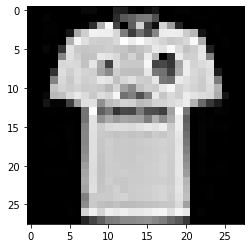

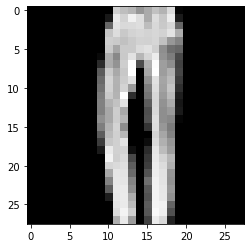

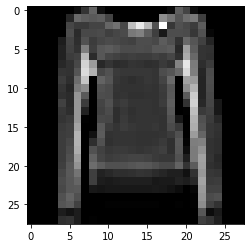

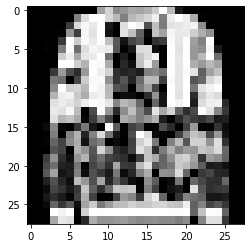

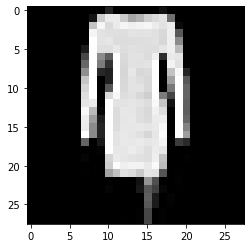

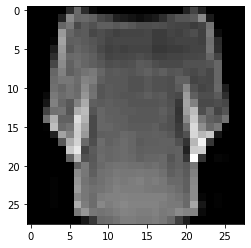

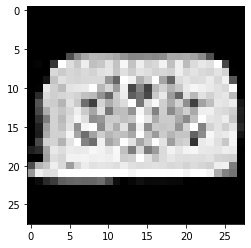

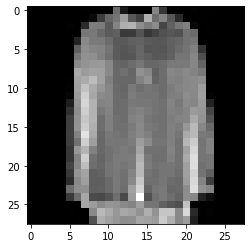

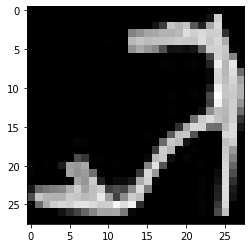

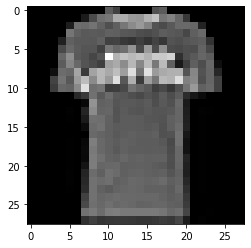

In [21]:
X_train = X.reshape((-1,28,28,1))
## there are 10 classes in y and 1000 total examples in each class

np.unique(y,return_counts=True)
 
# So its a balanced data set

Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)

for i in range(10):
    
    plt.figure(i)
    plt.imshow(X_train[i],cmap='gray')
    plt.show()

## Build CNN model using keras (sequintial model)

In [24]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)               

In [26]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])



In [28]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/20
32/32 [==============================] - 14s 425ms/step - loss: 0.6391 - accuracy: 0.7630 - val_loss: 0.5774 - val_accuracy: 0.7945
Epoch 2/20
32/32 [==============================] - 13s 412ms/step - loss: 0.5373 - accuracy: 0.8055 - val_loss: 0.5095 - val_accuracy: 0.8235
Epoch 3/20
32/32 [==============================] - 13s 414ms/step - loss: 0.4797 - accuracy: 0.8294 - val_loss: 0.4736 - val_accuracy: 0.8350
Epoch 4/20
32/32 [==============================] - 13s 412ms/step - loss: 0.4277 - accuracy: 0.8456 - val_loss: 0.4585 - val_accuracy: 0.8340
Epoch 5/20
32/32 [==============================] - 13s 420ms/step - loss: 0.3972 - accuracy: 0.8584 - val_loss: 0.4411 - val_accuracy: 0.8455
Epoch 6/20
32/32 [==============================] - 13s 412ms/step - loss: 0.3798 - accuracy: 0.8645 - val_loss: 0.3921 - val_accuracy: 0.8685
Epoch 7/20
32/32 [==============================] - 13s 410ms/step - loss: 0.3469 - accuracy: 0.8720 - val_loss: 0.4020 - val_accuracy: 0.8605

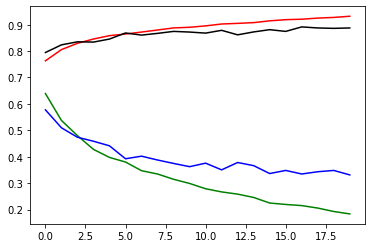

In [34]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')

plt.show()

